# Pymaceuticals Inc.
---
### Analysis

- Ramicane and Capomulin showed the least variability when comparing tumor volume measurements with low values for Variance, Std Deviation and Std Error.
- Ketapril had the largest average tumour volume of approximately 55mm3.
- No potential outliers for Capomulin, Ramicane and Ceftamin. Infubinol had a single outlying value. This could suggest that the data at hand is not severely distorted.
- At the same time, Ramicane and Capomulin regimen had more number of rows in the study which could have resulted in a more accurate result values when comparing other regimens.
- Almost equal number of female and male mice were studied. 
- The tumor volume in the case of mouse b128 treated under Capomulin regimen reduced significantly as timepoint increased. Eventhough the decrease wasnt steady or linear, the tumor volume and timepoint are inversely propotional. A line plot of tumor volume vs. time point for a single mouse (b128) treated with Capomulin shows the same.   
- The correlation coefficient suggested that mice with larger weight tend to have larger tumour volume. There is a relatively strong positive linear correlation between mouse weight and average observed tumor volume for the entire Capomulin regimen. The correlation coefficient is 0.84.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_micedata=pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID","Mouse ID"])

# Display the data table for preview
combined_micedata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mice_number=len(mouse_metadata["Mouse ID"])
mice_number

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_micedata=combined_micedata[combined_micedata.duplicated(["Mouse ID","Timepoint"])]
duplicate_micedata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_g989=combined_micedata[combined_micedata["Mouse ID"]=='g989']
duplicate_g989

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_micedata=combined_micedata.drop_duplicates(["Mouse ID"])
clean_micedata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [6]:
clean_micedata_all = pd.DataFrame(combined_micedata.loc[combined_micedata['Mouse ID'] != 'g989'])     
clean_micedata_all

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
number_mice_cleandata=len(clean_micedata["Mouse ID"])
number_mice_cleandata

249

In [8]:
# Checking the number of mice in the clean DataFrame.
number_mice_clean_micedata_all=len(clean_micedata_all["Mouse ID"])
number_mice_clean_micedata_all

1880

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
# grouped_df=clean_micedata.groupby(['Drug Regimen'])

mean_tumor_volume=clean_micedata_all.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
median_tumor_volume=clean_micedata_all.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
variance_tumor_volume=clean_micedata_all.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
std_tumor_volume=clean_micedata_all.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
sem_tumor_volume=clean_micedata_all.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()
                                                                  
summary_df = pd.DataFrame({
    "Mean Tumor Volume":mean_tumor_volume,
    "Median Tumor Volume":median_tumor_volume,
    "Tumor Volume Variance":variance_tumor_volume,
    "Tumor Volume Std. Dev.":std_tumor_volume,
    "Tumor Volume Std. Err.":sem_tumor_volume
})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_stats = clean_micedata_all.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem']) \
                .rename(columns={'mean': 'Mean', 'median': 'Median', 'var': 'Variance', 
                                 'std': 'StDev', 'sem': 'SEM'})
summary_stats.columns.name='Tumor Volume (mm3)'
summary_stats

Tumor Volume (mm3),Mean,Median,Variance,StDev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_data_df=clean_micedata_all.groupby('Drug Regimen')['Mouse ID'].count()
bar_data_df

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

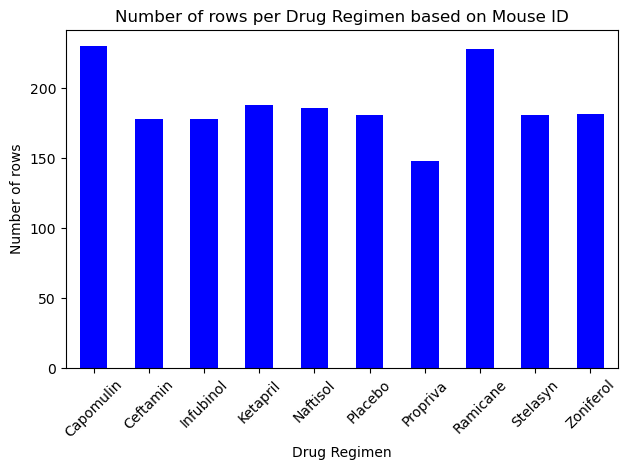

In [12]:
chart = bar_data_df.plot(kind='bar',title='Total Number of Mice per Drug Regimen', color='blue', legend=False)

plt.title('Number of rows per Drug Regimen based on Mouse ID')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of rows')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()


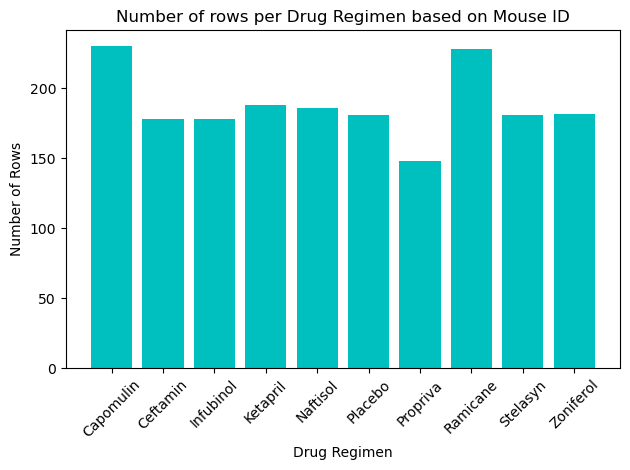

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
number_rows=clean_micedata_all.groupby('Drug Regimen')['Mouse ID'].count()
x_axis =number_rows.index

plt.bar(x_axis, number_rows, color="c", align="center")
plt.xlim=(0, len(x_axis)+1)
plt.ylim=(0, len(number_rows)+50)
plt.title('Number of rows per Drug Regimen based on Mouse ID')
plt.xlabel('Drug Regimen')
plt.xticks(rotation=45)
plt.ylabel('Number of Rows')
plt.tight_layout()
plt.show()

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_df=clean_micedata_all['Sex'].value_counts()
gender_df

Male      958
Female    922
Name: Sex, dtype: int64

<Axes: title={'center': 'A pie plot showing the distribution of female versus male mice'}, ylabel='Sex'>

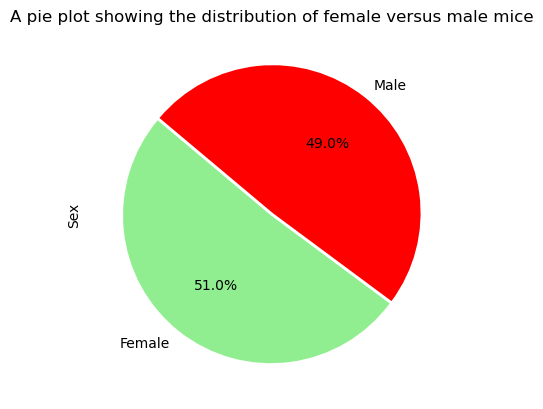

In [15]:
labels=["Female", "Male"]
colours=["lightgreen", "red"]
explode=(0.01,0.01)
gender_df.plot(kind='pie', labels=labels, explode=explode, colors =colours, title='A pie plot showing the distribution of female versus male mice',
            autopct='%1.1f%%',shadow=False, startangle=140)

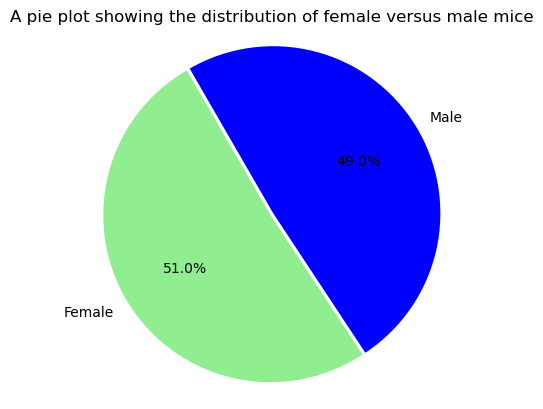

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels=["Female", "Male"]
sizes= gender_df
colours=["lightgreen", "blue"]
explode=(0.01,0.01)
plt.pie(sizes,labels=labels, explode=explode, colors=colours,
        autopct="%1.1f%%", shadow=False, startangle=120)
plt.title("A pie plot showing the distribution of female versus male mice")
plt.axis('equal')
plt.show()

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_regimens=['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
new_df=clean_micedata_all[clean_micedata_all['Drug Regimen'].isin(drug_regimens)]
new_df

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint_df=pd.DataFrame(new_df.groupby('Mouse ID')['Timepoint'].max())
greatest_timepoint_df

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_micedata=pd.merge(new_df, greatest_timepoint_df, how="right", on=["Timepoint","Mouse ID"])
merged_micedata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a275,Ceftamin,Female,20,28,45,62.999356,3
3,a411,Ramicane,Male,3,22,45,38.407618,1
4,a444,Ramicane,Female,10,25,45,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,Ceftamin,Female,6,27,45,68.594745,4
96,y793,Capomulin,Male,17,17,45,31.896238,2
97,y865,Ceftamin,Male,23,26,45,64.729837,3
98,z578,Ramicane,Male,11,16,45,30.638696,0


In [18]:
# Put treatments into a list for for loop (and later for plot labels)
drug_regimens=['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol={}

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
outliers = {}

for regimen in drug_regimens:
    regimen_data = merged_micedata[merged_micedata['Drug Regimen'] == regimen]['Tumor Volume (mm3)']
    
    q1 = regimen_data.quantile(0.25)
    q3 = regimen_data.quantile(0.75)
    iqr = q3 - q1
    
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
   
    # Determine outliers using upper and lower bounds
    outliers[regimen] = regimen_data[(regimen_data < lower_bound) | (regimen_data > upper_bound)]
    
for regimen, outliers in outliers.items():
    if len(outliers) == 0:
        print(f"No potential outliers for {regimen}.")
    else:
        print(f"Potential outliers for {regimen}:")
        print(outliers)

No potential outliers for Capomulin.
No potential outliers for Ramicane.
Potential outliers for Infubinol:
15    36.321346
Name: Tumor Volume (mm3), dtype: float64
No potential outliers for Ceftamin.


In [19]:
tumor_vol = {}

# Locate the rows which contain mice on each drug and get the tumor volumes
for regimen in drug_regimens:
    regimen_data = merged_micedata[merged_micedata['Drug Regimen'] == regimen]['Tumor Volume (mm3)']
    tumor_vol[regimen] = regimen_data.tolist()

for regimen, volumes in tumor_vol.items():
    print(f"Tumor volumes for {regimen}:")
    print(volumes)

Tumor volumes for Capomulin:
[38.98287774, 38.93963263, 30.48598484, 37.07402422, 40.1592203, 47.68596303, 37.31184577, 38.1251644, 38.75326548, 41.48300765, 38.84687569, 28.43096411, 33.32909778, 46.53920617, 32.37735684, 41.58152074, 23.34359787, 40.72857787, 34.45529799, 31.02392294, 40.65812366, 39.95234669, 36.04104736, 28.48403281, 31.8962384]
Tumor volumes for Ramicane:
[38.4076183, 43.0475426, 38.81036633, 32.97852192, 38.34200823, 33.39765251, 37.31123552, 40.65900627, 29.12847181, 33.56240217, 36.37451039, 31.56046955, 36.13485243, 22.05012627, 30.56462509, 31.09533505, 45.22086888, 36.56165229, 37.22565033, 43.41938077, 30.27623175, 40.66771292, 43.16637266, 44.18345092, 30.63869575]
Tumor volumes for Infubinol:
[67.97341878, 65.52574285, 57.03186187, 66.08306589, 72.2267309, 36.3213458, 60.96971133, 62.43540402, 60.91876652, 67.28962147, 66.19691151, 62.11727887, 47.01036401, 60.16518046, 55.62942846, 45.69933088, 54.65654872, 55.65068132, 46.25011212, 54.04860769, 51.54243

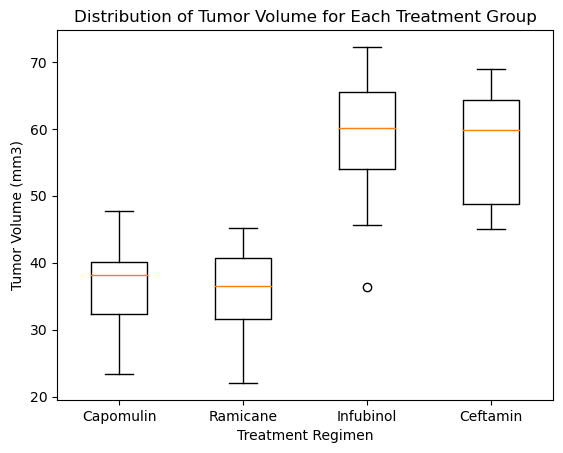

In [20]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
data_to_plot = [tumor_vol[regimen] for regimen in drug_regimens]

plt.boxplot(data_to_plot, labels=drug_regimens)
plt.xlabel('Treatment Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Distribution of Tumor Volume for Each Treatment Group')

plt.show()

## Line and Scatter Plots

In [21]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
req_drug = 'Capomulin'
req_drug_data = clean_micedata_all[clean_micedata_all['Drug Regimen'] == req_drug]
req_drug_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [22]:
req_mouse = 'b128'
req_mouse_data = req_drug_data[req_drug_data['Mouse ID'] == req_mouse]
req_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
300,b128,Capomulin,Female,9,22,0,45.000000,0
301,b128,Capomulin,Female,9,22,5,45.651331,0
302,b128,Capomulin,Female,9,22,10,43.270852,0
303,b128,Capomulin,Female,9,22,15,43.784893,0
304,b128,Capomulin,Female,9,22,20,42.731552,0
305,b128,Capomulin,Female,9,22,25,43.262145,1
306,b128,Capomulin,Female,9,22,30,40.605335,1
307,b128,Capomulin,Female,9,22,35,37.967644,1
308,b128,Capomulin,Female,9,22,40,38.379726,2
309,b128,Capomulin,Female,9,22,45,38.982878,2


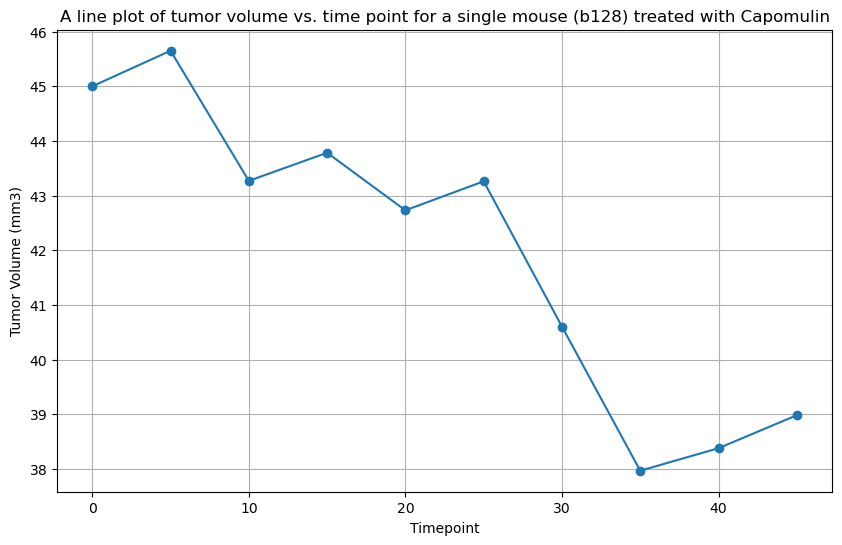

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(req_mouse_data['Timepoint'], req_mouse_data['Tumor Volume (mm3)'], marker='o')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('A line plot of tumor volume vs. time point for a single mouse (b128) treated with Capomulin')
plt.grid(True)

In [24]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_micedata_all.loc[clean_micedata_all['Drug Regimen']== 'Capomulin']
capomulin_data_df = pd.DataFrame(capomulin_data.groupby('Mouse ID').mean(numeric_only=True))
capomulin_data_df.head()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.7
b742,7.0,21.0,22.5,40.083699,0.0
f966,16.0,17.0,10.0,36.505973,0.0
g288,3.0,19.0,22.5,41.990097,0.8
g316,22.0,22.0,22.5,44.613344,1.0


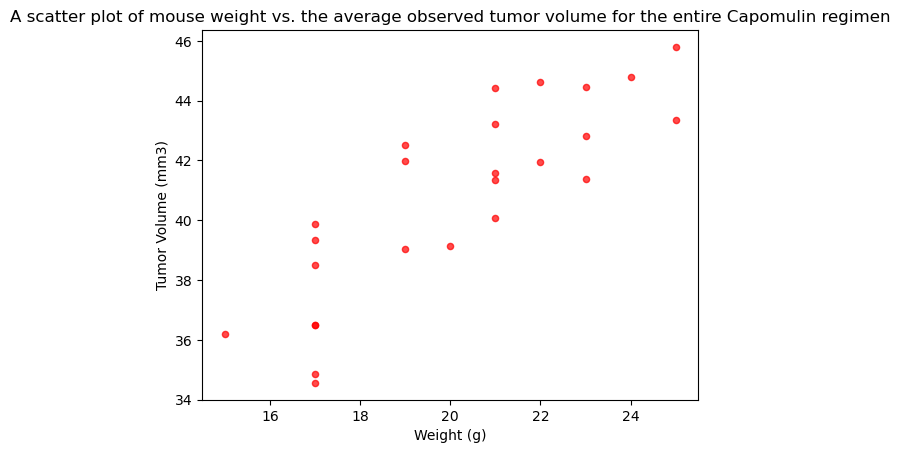

<function matplotlib.pyplot.show(close=None, block=None)>

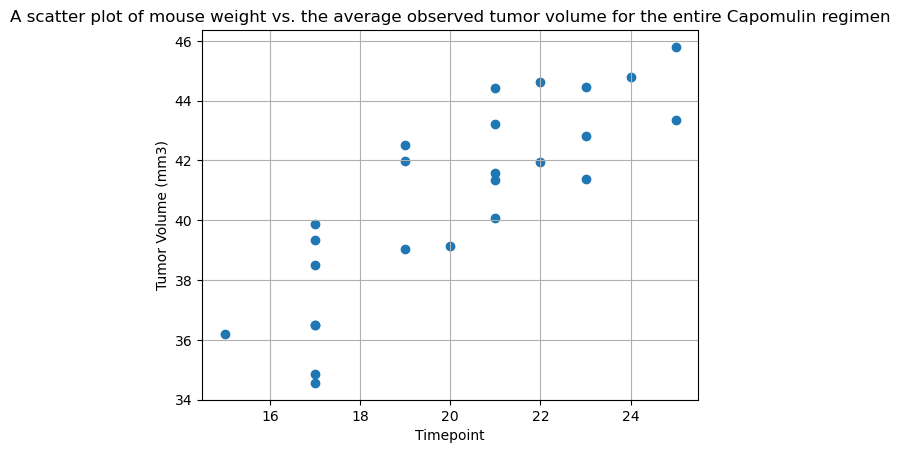

In [25]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_plot = capomulin_data_df.plot(kind='scatter', x='Weight (g)', y ='Tumor Volume (mm3)', c="red", edgecolors="red", alpha=0.7, 
                                        title="A scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen")
plt.show()

# OR

weight = capomulin_data_df['Weight (g)']
volume=capomulin_data_df['Tumor Volume (mm3)']
plt.scatter(weight,volume)
plt.title('A scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(True)
plt.show

## Correlation and Regression

In [26]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

In [27]:
weight = capomulin_data_df['Weight (g)']
volume=capomulin_data_df['Tumor Volume (mm3)']
correlation = st.pearsonr(weight,volume)
print(f"The correlation between mouse weight and average observed tumor volume for the entire Capomulin regimen is {round(correlation[0],2)}")

The correlation between mouse weight and average observed tumor volume for the entire Capomulin regimen is 0.84


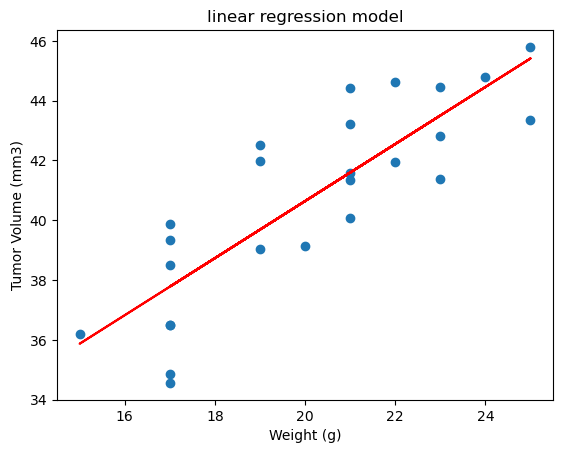

In [28]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, volume)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight, volume)
plt.title('linear regression model')
plt.plot(weight,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()
